In [12]:
import os
import warnings
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
import statistics
from scipy.stats import norm


In [3]:
destination =  os.environ.get('LR_Destination')
ChurnData = pd.read_csv(str(destination + '/' + 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

#First drop off customerID column
if 'customerID' in ChurnData.columns.values:
     ChurnData = ChurnData.drop(['customerID'],axis=1)
else:
     1==1

#Converting Total Charges to Float
ChurnData['TotalCharges'] = pd.to_numeric(ChurnData['TotalCharges'], errors='coerce').fillna(pd.to_numeric(ChurnData['TotalCharges'], errors='coerce').mean())


unique_values_dict = {}
for cols in ChurnData.columns.values:
    if ChurnData[cols].dtypes != 'int64' and ChurnData[cols].dtypes != 'float64':
          unique_values_dict[cols] = ChurnData[cols].unique()

for i in unique_values_dict:
    remapped_values = {}
    names_and_remapped_values = {}
    #  print(i, unique_values_dict[i])

    #for i in range of length of values in key:values for gender
    for iterator in range(len(unique_values_dict[i])):
        remapped_values[unique_values_dict[i][iterator]] = iterator

        names_and_remapped_values[i] = remapped_values 

    for key in names_and_remapped_values:
        ChurnData[key] = ChurnData[key].map(names_and_remapped_values[key])

 After loading in the data, we can observe a linear relationship between the independent variable, and the log-odds of the dependent variable. This is a major assumption of the logistic regression. The model assumes this relationship for binary classification.

Optimization terminated successfully.
         Current function value: 0.578562
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.568022
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.567145
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.564132
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.510569
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.578527
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577936
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.577476
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.515126
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.575824
  

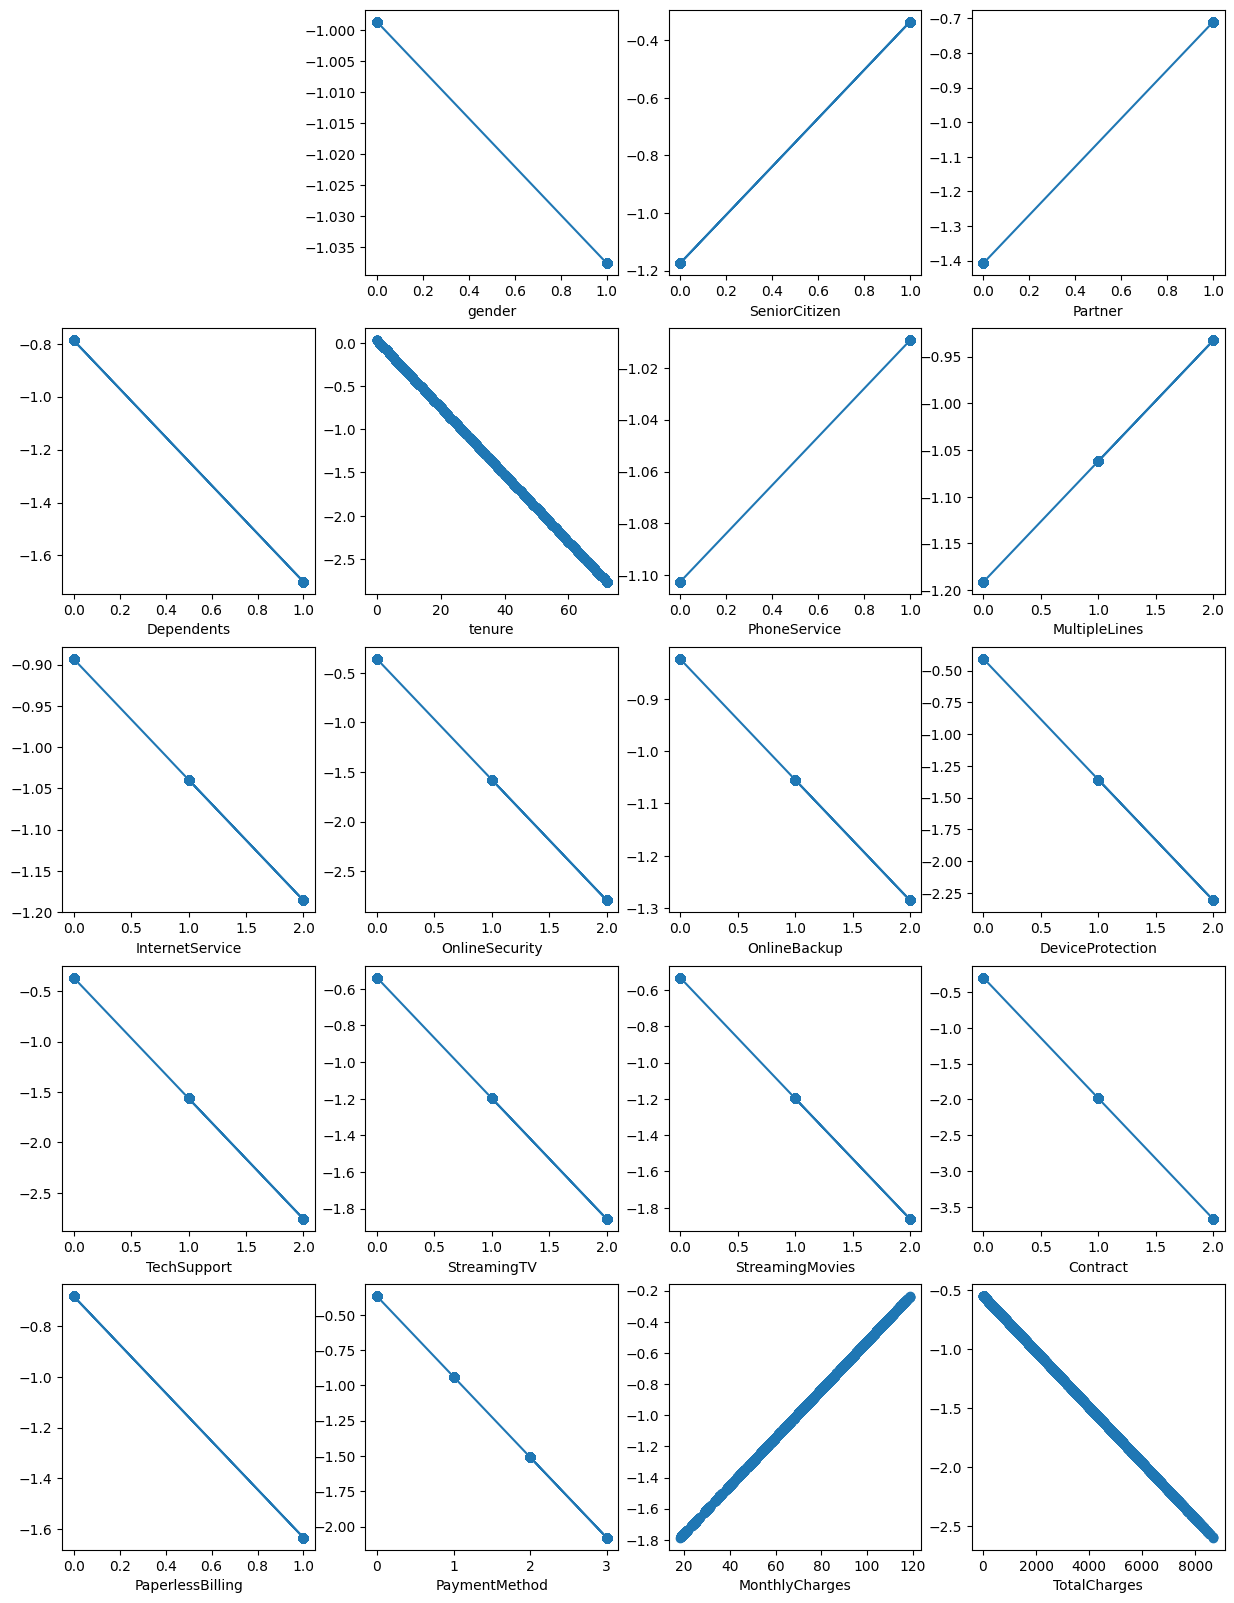

In [4]:
var_list = [item for item in ChurnData.columns if item != 'pred_prob' and item != 'log_odds' and item != 'Churn']

figure, axis = plt.subplots(5, 4, figsize=(15, 20))

iterator = -1
for i in range(5):
    for j in range(4):
        if iterator >= 0:
            ind = sm.add_constant(ChurnData[var_list[iterator]])
            dep = ChurnData['Churn']

            two_d_model = sm.Logit(endog=dep,exog=ind).fit()

            pred_probs = two_d_model.predict(ind)

            log_odds = np.log((pred_probs) / (1 - pred_probs))
            slope, intercept, rvalue, pvalue, sterr = stats.linregress(ChurnData[var_list[iterator]], log_odds)

            axis[i,j].scatter(ChurnData[var_list[iterator]], log_odds)
            axis[i,j].plot(ChurnData[var_list[iterator]], slope*ChurnData[var_list[iterator]] + intercept)
            axis[i,j].set_xlabel(var_list[iterator])
            # axis[i,j].set_ylabel('Log Odds of Churn')
            iterator += 1
        else:
            iterator += 1

figure.delaxes(axis[0,0])

###  Looking for Outliers

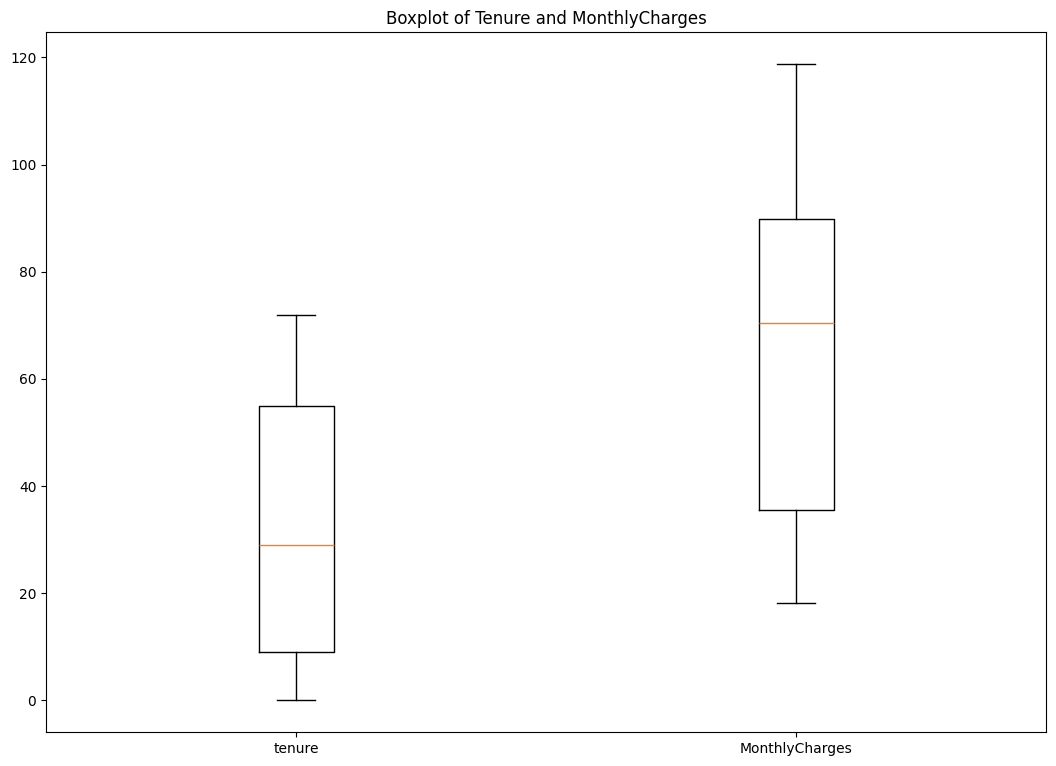

In [ ]:
ChurnData['MonthlyCharges']

fig = plt.figure(figsize=(10,7))

con_data1 = ChurnData['tenure']
con_data2 = ChurnData['MonthlyCharges']

data = [con_data1, con_data2]

ax = fig.add_axes([0,0,1,1])
ax.set_title("Boxplot of Tenure and MonthlyCharges")
ax.set_xticklabels(["tenure", "MonthlyCharges"])

bp = ax.boxplot(data)


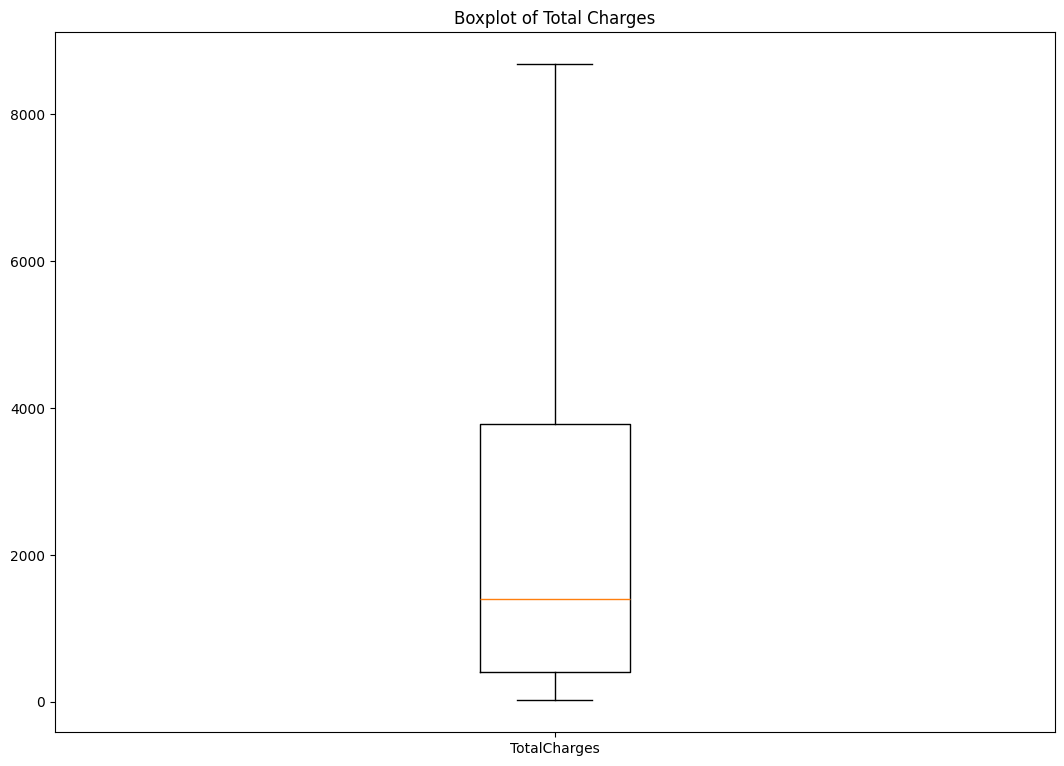

In [62]:
con_data2 = ChurnData['TotalCharges']

fig = plt.figure(figsize=(10,7))

ax = fig.add_axes([0,0,1,1])
ax.set_title("Boxplot of Total Charges")
ax.set_xticklabels(["TotalCharges"])

bp = ax.boxplot(con_data2)

##### By default, the library matplotlib shows outliers within box plots by default, indicated as points outside the whiskers of the box plot. When visualizing the continuous variables, we see that **no outliers** exist within the dataset.

100%|██████████| 955k/955k [00:00<00:00, 1.60MB/s]


File deleted sucessfully.
Fitting 5 folds for each of 2000 candidates, totalling 10000 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Accuracy of RandomizedSearchCV: 82.33% 
 
Classification Report: 
 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Accuracy of GridSearchCV: 82.47% 

Classification Report: 
 
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.70      0.58      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

Accuracy of LogisticRegression [No Optimized Hyperparameters]: 8

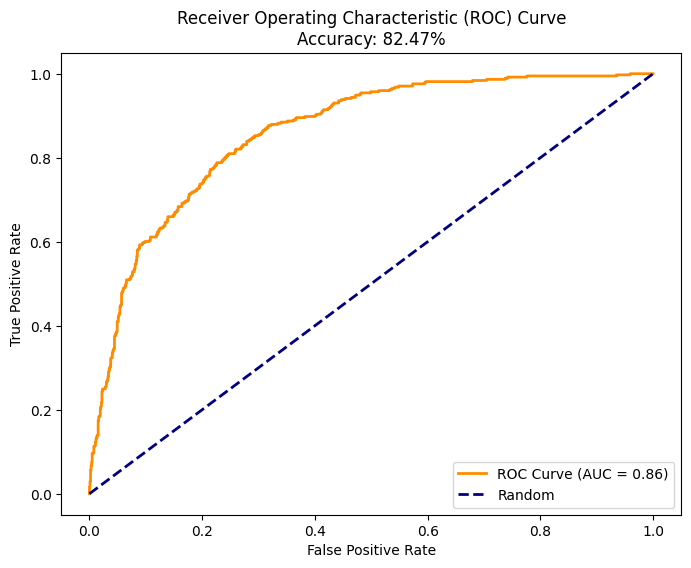

Optimization terminated successfully.
         Current function value: 0.414247
         Iterations 8


''

In [21]:
%run ./LogisticRegression.ipynb
;

## Logistic Regression Model Building

#### Hyperparameter Tuning

Overview:

There are two common methods for tuning hyperparameters: **`GridSearchCV`** and **`RandomizedSearchCV`**.

- **`GridSearchCV`**  
  - This algorithm works by exhaustively searching through **all possible** combinations of model configuration.
  - We define a parameter grid, which acts as a dictionary where the keys are the different hyperparameters, and the values are the ranges of values that we want to explore. 
  - The downside of this is that it can be very computationally expensive, so it's important to understand whether or not accuracy of a model is priority.
  - This **performance** is based on different metrics, such as F1-Score, Accuracy, Recall, and Precision



- **`RandomizedSearchCV`**  
  - Samples **random** combinations from the hyperparameter space, rather than searching all possible combinations.  
  - Advantages to this is that RandomizedSearchCV can be **much faster**, however it's possible to miss the **best possible combination**


The different hyperparameters that are important in logistic regression are...

- **penalty** - controls regularization, helping prevent overfitting by adding constraint to the model's coefficient
- **tol** - Tolerance for stopping criteria of gradient descent. Gradient descent is an optimization algorithm used to train ML models by minimizing errors between predicted and actual results by iteratively changing parameters.
- **C** - C is the inverse of regularization. It is a constant that determines how strongly regularization will affect the model.
- **solver** - These are the methods that try and estimate the best possible parameters while producing the least amount of error in predicting the output, aka the cost function.
- **max_iter** - specifies max # of iterations that solver is allowed to take in order to converge to a solution

**Analysis of Model Metrics**

| Metric     | RandomizedSearchCV    | GridSearchCV     | Default     |
|--------------|--------------|--------------|--------------|
| Precision     | Class 0 = 0.86, Class 1 = 0.68 | Class 0 = 0.86, Class 1 = 0.70 | Class 0 = 0.86, Class 1 = 0.69 |
| Recall   | Class 0 = 0.90, Class 1 = 0.60 | Class 0 = 0.91, Class 1 = 0.58 | Class 0 = 0.90, Class 1 = 0.60 |
| F1-Score | Class 0 = 0.88, Class 1 = 0.64 | Class 0 = 0.88, Class 1 = 0.64 | Class 0 = 0.88, Class 1 = 0.64 |

- Model performance is consistent mostly throughout any hyperparameter tuning method
- There is only slight variations between these different metrics, Higher recall in class 0 for GridSearchCV, higher precision for Class 1 in GridSearchCV
- Reasons for this could be that the default hyperparameters for this model produced nearly the best output. 
- We will use the GridSearchCV hyperparameters for our model, since it has the best performance 

## Statistical Analysis

A p-value of < .05 indicates that the likelihood of obtaining the observed data, assuming no relationship, is less than 5%. This means that the observed effect is not random, inferring a statistically significant relationship between the feature and the dependent variable - **`Churn`** .

## Key Findings

- **Paperless Billing**: Customers with paperless billing or those who use electronic checks have a significant chance of churning.
- **Senior Citizen**: Older individuals are more likely to leave the Telco service.
- **Contract_Two Year / Contract_One year** although not very insightful, customers that had a one year or two year contract were likely not going to churn.
- **Total Charges** total charges didn't have that much of an effect on whether or not a customer churns or not.

In [22]:
model_coefficients.loc[model_coefficients['P>|z|'].astype(float) < .05].sort_values(by='Coef',ascending=False)

,ColumnName,Coef,Std. Err,z,P>|z|,[0.025,0.975]
8,MonthlyCharges,2.9233,0.543,5.383,0.000,1.859,3.988
9,TotalCharges,2.5991,0.595,4.370,0.000,1.433,3.765
7,PaperlessBilling,0.3479,0.074,4.677,0.000,0.202,0.494
22,PaymentMethod_Electronic check,0.3078,0.094,3.258,0.001,0.123,0.493
2,SeniorCitizen,0.2132,0.085,2.522,0.012,0.047,0.379
5,tenure,-4.1690,0.433,-9.630,0.000,-5.018,-3.321
20,Contract_Two year,-1.4024,0.176,-7.979,0.000,-1.747,-1.058
6,PhoneService,-1.2912,0.159,-8.118,0.000,-1.603,-0.979
19,Contract_One year,-0.6755,0.107,-6.293,0.000,-0.886,-0.465
13,OnlineSecurity_Yes,-0.5431,0.094,-5.801,0.000,-0.727,-0.360


# Decision Tree Model Building

RandomizedSearchCV Performance: 79.06%
RandomizedSearchCV chosen hyperparameters: {'min_samples_leaf': 10, 'max_features': 7, 'max_depth': 5, 'criterion': 'gini'}

Classification Report [RandomizedSearchCV]: 
 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.58      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409
weighted avg       0.79      0.79      0.79      1409

GridSearchCV Performance: 80.2%
GridScoreCV chosen hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_leaf': 6}

Classification Report [GridSearchCV]: 
 
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1036
           1       0.61      0.58      0.59       373

    accuracy                           0.79      1409
   macro avg       0.73      0.72      0.73      1409


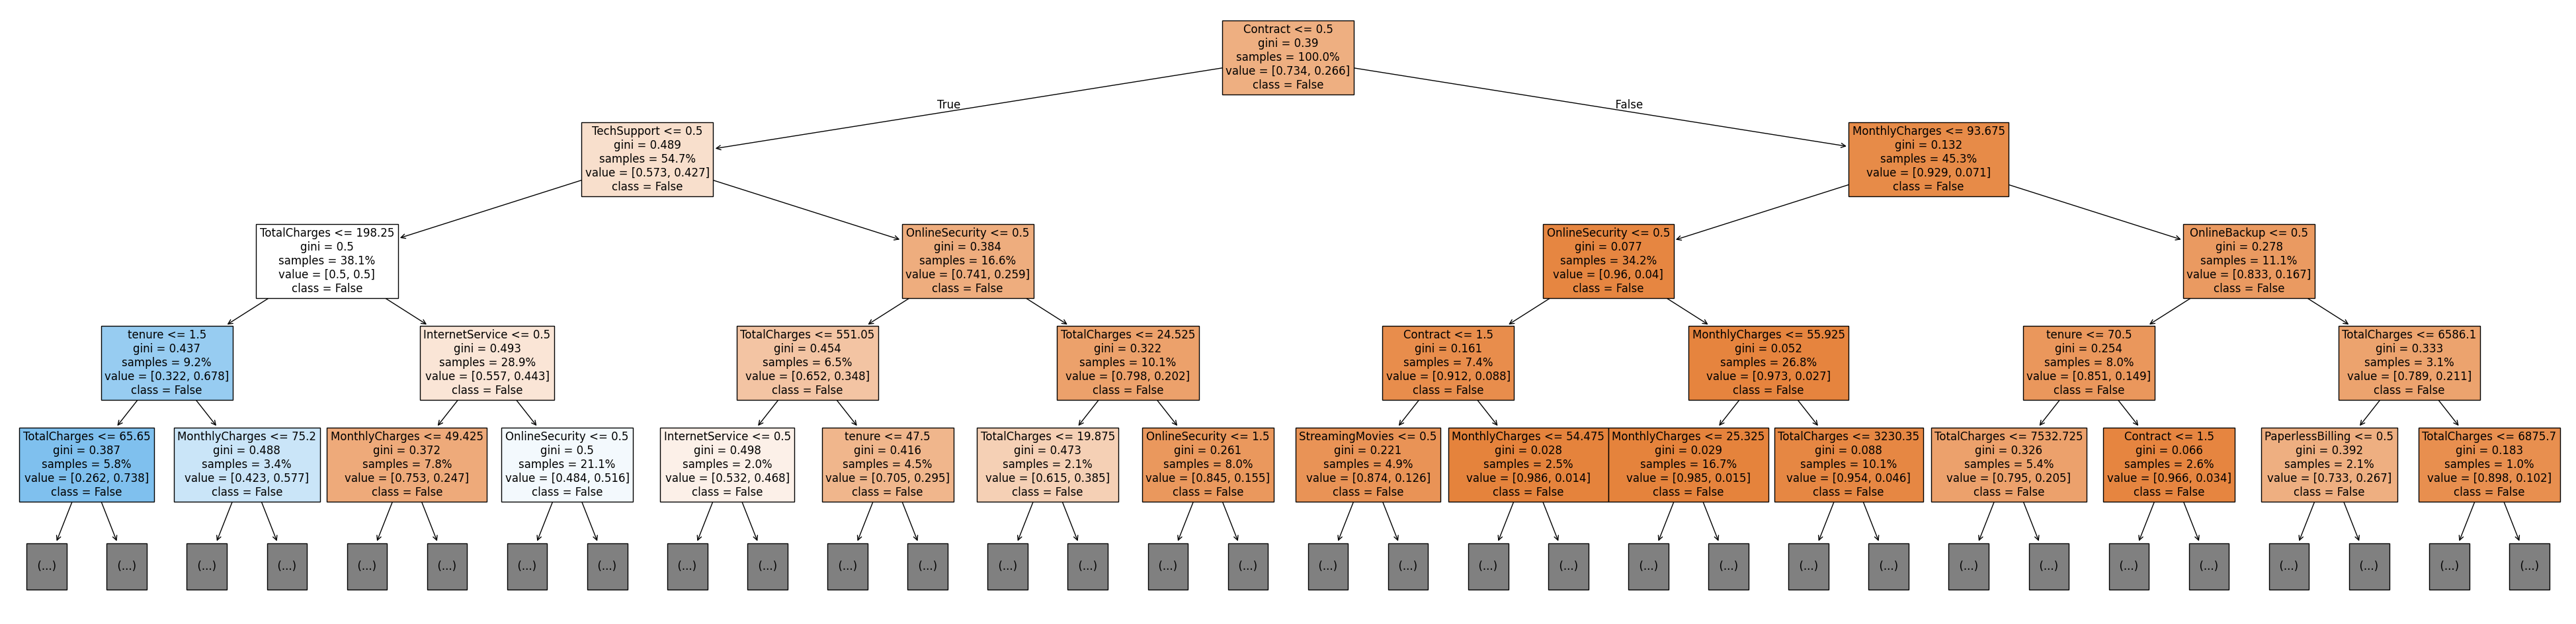

In [24]:
%run ./DecisionTree.ipynb

Although Decision Trees can train on complex non-linear relationships to determine the relationship between a feature and a  target variable, it can't understand categorical features that are expressed through strings like `'Yes'` or `'No'` / `'Female'` or `'Male'` so we must map to these to numerical values without necessarily needing to create indicator variables unlike with building a logistic regression model.

<u>**Decision Tree Analysis**</u>

Root Node: **`PaymentMethod`** being in the root node suggests that it has the highest impact on Churn probability. There are several payment methods including **`Electronic check`**, **`Mailed Check`**, **`Bank Transfer (automatic)`**, and **`Credit Card (automatic)`**. It would be worth exploring how one method of payment may be causing higher churn rates compared to other methods. The root node is determined by differences in entropy, a measure of randomness within a system. When using entropy to build a decision tree, the root node is determined by Information Gain. This is the difference between the entropy before and the entropy of resulting subsets after the split, another way of framing information gain is measuring how much uncertainty is reduced in predicting Churn when splitting on a particular feature

Leaf Nodes: **`OnlineBackup`** and **`Tenure`** had the lowest entropy scores, at the leaves. This would indicate that Tenure and Onlinebackup had a very strong relationship to Churn levels.

\
<u>**Hyperparameter Improvement**</u>

Hyperparameter tuning increased all overall metrics with tuning. GridSearchCV showed improvements in the following metrics

- **Precision** *(Churn)*: **0.49 -> 0.68**  
- **Recall** *(Non-Churn)*: **0.81 -> 0.93**  
- **F1-Score**:  
  - *(Churn)*: **0.50 -> 0.52**  
  - *(Non-Churn)*: **0.82 -> 0.87**

\
<u>**Business Interpretation / Next Steps**</u>

- It would be advisable to research different payment methods in the company and see which ones are linked to higher levels of Churn
- Tenure also had a large effect on whether a customer had churned. Incentivize customers with either lower tenure or higher tenure. Tenure also accounted for a little over 9% of the entire dataset, and the metrics indicate that 94-95% of customers that churn or stay are dependent on tenure amount. This company should establish targeted retention incentives programs, such as a temporary free subscription for users that haven't stayed with the company long.
-  OnlineBackup services also had a large effect on customer churn, it would be worth analyzing this feature more. perhaps implementing discounts for online backup services, or bundled packages to retain these customers
